In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
'''# Install W&B 
!pip install -q --upgrade wandb
# Login 
import wandb
wandb.login()'''

'# Install W&B \n!pip install -q --upgrade wandb\n# Login \nimport wandb\nwandb.login()'

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.5/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/kaggle/input/examplepicture/example.jpg' save=True

/kaggle/working
100%|███████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 108MB/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /kaggle/input/examplepicture/example.jpg: 640x480 1 person, 1 bottle, 1 cup, 1 fork, 2 sandwichs, 1 chair, 1 dining table, 64.9ms
Speed: 3.2ms pre-process, 64.9ms inference, 23.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/kaggle/working


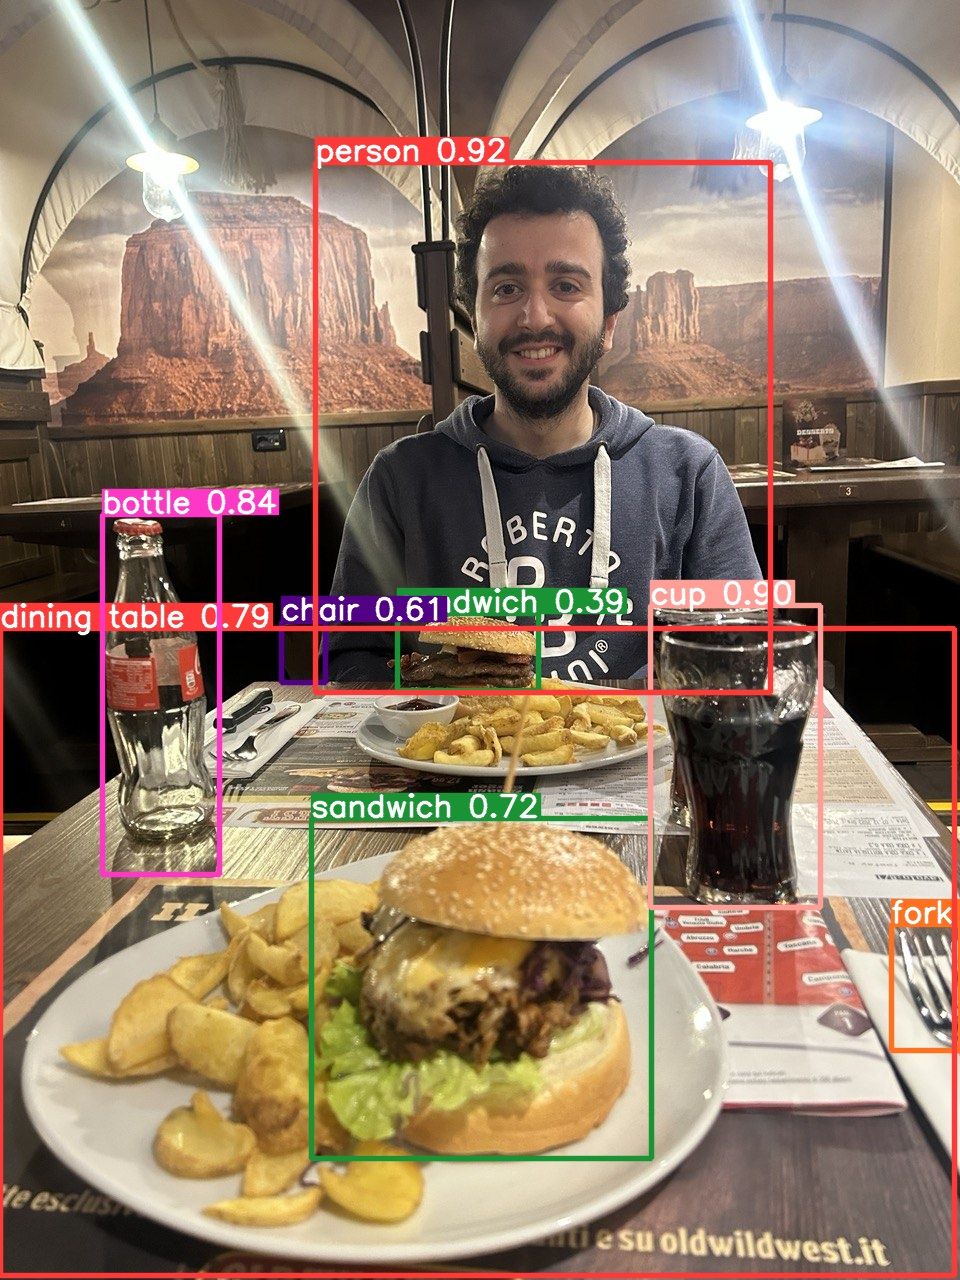

In [6]:
%cd {HOME}
Image(filename='/kaggle/working/runs/detect/predict/example.jpg', height=200)

In [7]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '/kaggle/input/yolov8-vehicle-dataset/yolov8/train/',
    val = '/kaggle/input/yolov8-vehicle-dataset/yolov8/valid/',
    nc =  4,
    names = ['bus', 'cars', 'truck', 'van']
)

with open('/kaggle/working/data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='/kaggle/input/examplepicture/example.jpg', conf=0.25)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


In [9]:
results[0].boxes.xyxy

tensor([[ 315.,  162.,  770.,  692.],
        [ 650.,  605.,  820.,  907.],
        [ 102.,  514.,  219.,  874.],
        [   0.,  628.,  954., 1275.],
        [ 311.,  818.,  651., 1158.],
        [ 281.,  621.,  325.,  682.],
        [ 891.,  924.,  960., 1050.],
        [ 397.,  613.,  538.,  690.]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.91708, 0.90211, 0.84053, 0.79272, 0.72227, 0.61446, 0.58720, 0.39053], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0., 41., 39., 60., 48., 56., 42., 48.], device='cuda:0')

In [12]:
!yolo cfg

Printing '/opt/conda/lib/python3.10/site-packages/ultralytics/yolo/cfg/default.yaml'

agnostic_nms: false
augment: false
batch: 16
box: 7.5
boxes: true
cache: false
cfg: null
classes: null
close_mosaic: 10
cls: 0.5
conf: null
copy_paste: 0.0
cos_lr: false
data: null
degrees: 0.0
deterministic: true
device: null
dfl: 1.5
dnn: false
dropout: 0.0
dynamic: false
epochs: 100
exist_ok: false
fl_gamma: 0.0
fliplr: 0.5
flipud: 0.0
format: torchscript
half: false
hide_conf: false
hide_labels: false
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
image_weights: false
imgsz: 640
int8: false
iou: 0.7
keras: false
label_smoothing: 0.0
line_thickness: 3
lr0: 0.01
lrf: 0.01
mask_ratio: 4
max_det: 300
mixup: 0.0
mode: train
model: null
momentum: 0.937
mosaic: 1.0
name: null
nbs: 64
nms: false
opset: null
optimize: false
optimizer: SGD
overlap_mask: true
patience: 50
perspective: 0.0
plots: true
pretrained: false
project: null
rect: false
resume: false
retina_masks: false
save: true
save_conf: false
save_crop: fals

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/kaggle/working/data.yaml epochs=100 imgsz=800 plots=True

/kaggle/working
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/working/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/kaggle/working/data.yaml

/kaggle/working
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/input/yolov8-vehicle-dataset/yolov8/valid/labels... 16 ima
val: WARNING ⚠️ Cache directory /kaggle/input/yolov8-vehicle-dataset/yolov8/valid is not writeable
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         16        275      0.896      0.959      0.985      0.841
                   bus         16          3      0.782          1      0.995      0.797
                  cars         16        263      0.942       0.97      0.974      0.852
                 truck         16 